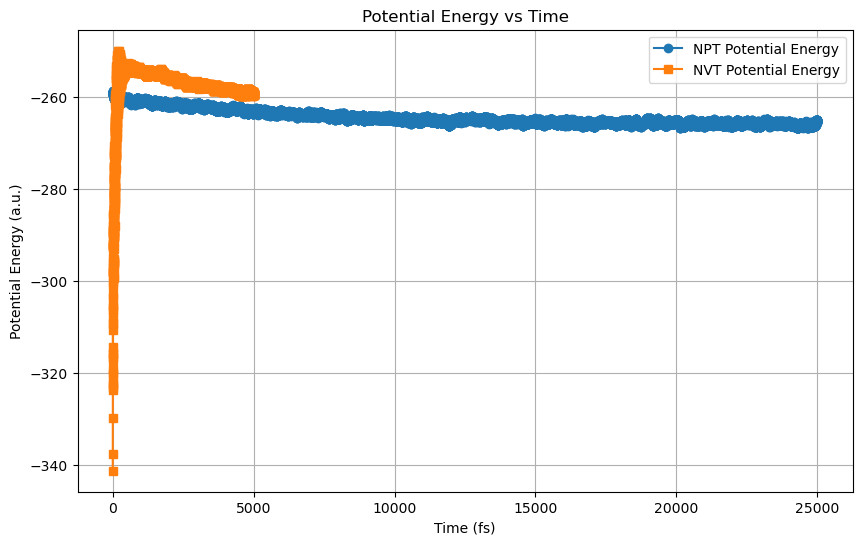

Plot saved to ../Figures/potential_energy_vs_time.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the NPT energy file
npt_file = "../Outputs/NPT-1.ener"
nvt_file = "../Outputs/NVT-1.ener"

# Define a function to load and clean the energy data
def load_energy_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip comment lines and extract numerical data
    data = [line.split() for line in lines if not line.startswith("#")]
    # Convert to DataFrame
    columns = ["Step", "Time_fs", "Kin_a.u.", "Temp_K", "Pot_a.u.", "ConsQty_a.u.", "UsedTime_s"]
    df = pd.DataFrame(data, columns=columns)
    
    # Convert numerical columns to float
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Load NPT and NVT data
npt_data = load_energy_file(npt_file)
nvt_data = load_energy_file(nvt_file)

# Step 2: Plot potential energy vs time
plt.figure(figsize=(10, 6))

# Plot NPT data
plt.plot(npt_data["Time_fs"], npt_data["Pot_a.u."], label="NPT Potential Energy", linestyle='-', marker='o')

# Plot NVT data
plt.plot(nvt_data["Time_fs"], nvt_data["Pot_a.u."], label="NVT Potential Energy", linestyle='-', marker='s')

# Customize the plot
plt.title("Potential Energy vs Time")
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u.)")
plt.legend()
plt.grid(True)

# Step 3: Save the figure to the Figures directory
output_figure_path = "../Figures/potential_energy_vs_time.png"
plt.savefig(output_figure_path)
plt.show()

print(f"Plot saved to {output_figure_path}")
